In [6]:
import flask
import xgboost
from xgboost import XGBClassifier
import pickle
import pandas as pd
import numpy as np
import sys

Data Cleaning Done
Imputation Done
Binarisation Done
Thresh=0.006, n=50, Accuracy: 98.56%, F1 score: 0.43
                  Importance           Feature
AMS_0               0.104264             AMS_0
GCSVerbal           0.098478         GCSVerbal
GCSEye              0.026872            GCSEye
SFxPalp_0           0.022870         SFxPalp_0
SFxBasOto_0         0.020204       SFxBasOto_0
NeuroD_0            0.017127          NeuroD_0
AMSOth_0            0.016523          AMSOth_0
SFxBas_0            0.016043          SFxBas_0
NeuroDSensory_0     0.014592   NeuroDSensory_0
SFxPalp_1           0.013132         SFxPalp_1
SFxBasHem_1         0.012629       SFxBasHem_1
NeuroDOth_0         0.012257       NeuroDOth_0
HemaLoc_3           0.011096         HemaLoc_3
ClavPar_1           0.010673         ClavPar_1
VomitLast_1         0.010513       VomitLast_1
SFxBasRet_0         0.010274       SFxBasRet_0
LOCSeparate_0       0.010234     LOCSeparate_0
SFxPalpDepress_1    0.009590  SFxPalpDepress_1
O

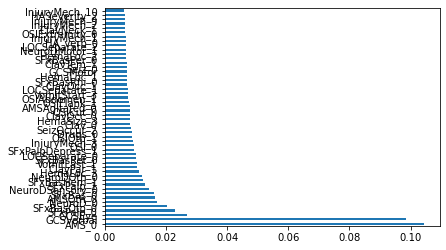

In [7]:
import pandas as pd
import numpy as np
import DataCleaning
import Imputation
import FeatureEngineering
import Model

pecarn_data = pd.read_csv('TBI PUD 10-08-2013.csv', index_col=0)
clean_data = DataCleaning.datacleaning(pecarn_data)
imputed_data = Imputation.impute(clean_data)
binary_data = FeatureEngineering.binarized(imputed_data)
features,clf,X = Model.getModel(binary_data)
clf.features = features

In [ ]:
xTrain

In [ ]:
yTrain

In [4]:
from matplotlib import pyplot as plt

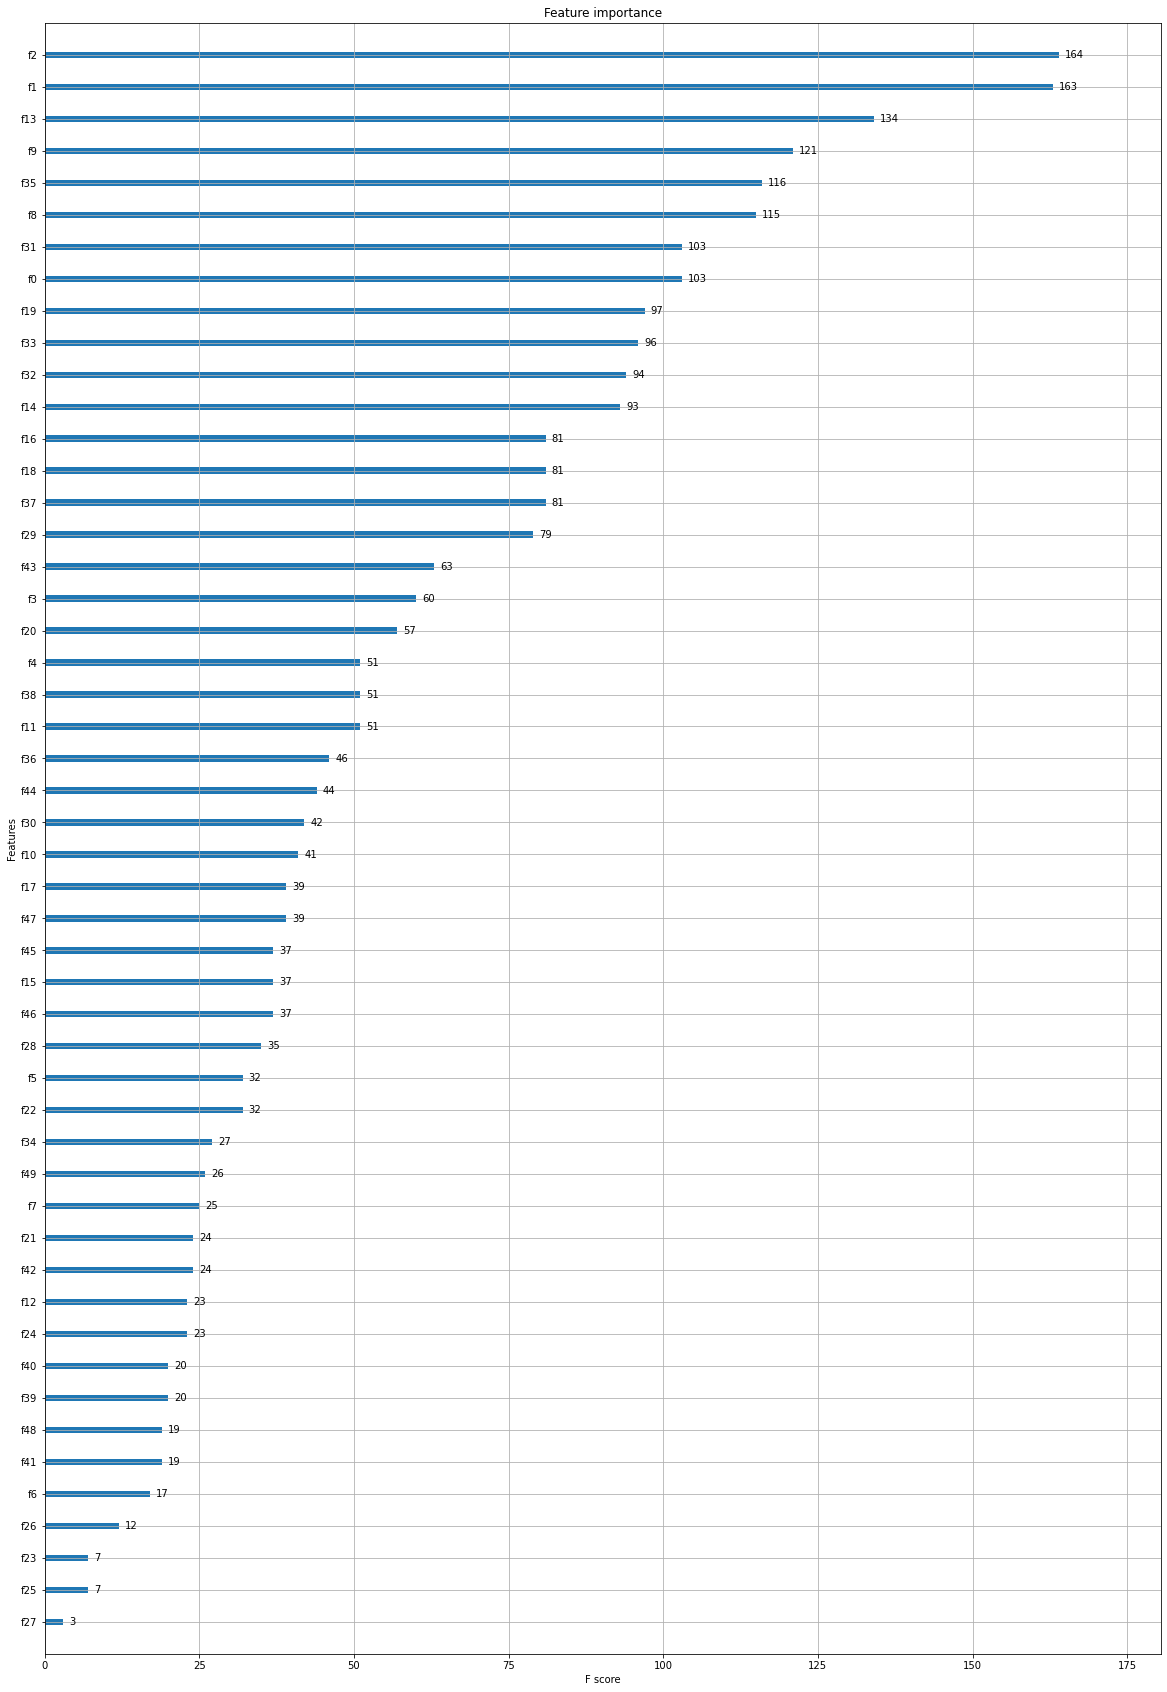

In [8]:
ax = xgboost.plot_importance(clf)
fig = ax.figure
fig.set_size_inches(20, 30)

In [13]:
clf.get_booster().feature_names

['f0',
 'f1',
 'f2',
 'f3',
 'f4',
 'f5',
 'f6',
 'f7',
 'f8',
 'f9',
 'f10',
 'f11',
 'f12',
 'f13',
 'f14',
 'f15',
 'f16',
 'f17',
 'f18',
 'f19',
 'f20',
 'f21',
 'f22',
 'f23',
 'f24',
 'f25',
 'f26',
 'f27',
 'f28',
 'f29',
 'f30',
 'f31',
 'f32',
 'f33',
 'f34',
 'f35',
 'f36',
 'f37',
 'f38',
 'f39',
 'f40',
 'f41',
 'f42',
 'f43',
 'f44',
 'f45',
 'f46',
 'f47',
 'f48',
 'f49']

In [14]:
X.columns

Index(['GCSEye', 'GCSVerbal', 'GCSMotor', 'AgeInMonth', 'InjuryMech_1',
       'InjuryMech_2', 'InjuryMech_3', 'InjuryMech_4', 'InjuryMech_5',
       'InjuryMech_6',
       ...
       'Drugs_1', 'Gender_1', 'Gender_2', 'Ethnicity_1', 'Ethnicity_2',
       'Race_1', 'Race_2', 'Race_3', 'Race_4', 'Race_5'],
      dtype='object', length=157)

In [16]:
features

['GCSEye',
 'GCSVerbal',
 'GCSMotor',
 'InjuryMech_1',
 'InjuryMech_2',
 'InjuryMech_3',
 'InjuryMech_9',
 'InjuryMech_10',
 'LOCSeparate_0',
 'LOCSeparate_1',
 'LOCSeparate_2',
 'Seiz_0',
 'SeizOccur_2',
 'HA_verb_0',
 'HASeverity_2',
 'VomitStart_3',
 'VomitLast_1',
 'AMS_0',
 'AMSAgitated_0',
 'AMSOth_0',
 'SFxPalp_0',
 'SFxPalp_1',
 'SFxPalpDepress_1',
 'SFxBas_0',
 'SFxBasHem_1',
 'SFxBasOto_0',
 'SFxBasPer_0',
 'SFxBasRet_0',
 'SFxBasRhi_0',
 'HemaLoc_1',
 'HemaLoc_2',
 'HemaLoc_3',
 'HemaSize_3',
 'Clav_0',
 'ClavNeck_1',
 'ClavOcc_0',
 'ClavOcc_1',
 'ClavPar_1',
 'ClavTem_1',
 'NeuroD_0',
 'NeuroDMotor_1',
 'NeuroDSensory_0',
 'NeuroDOth_0',
 'OSI_0',
 'OSIExtremity_0',
 'OSICut_0',
 'OSIFlank_1',
 'OSIAbdomen_1',
 'OSIOth_1',
 'Drugs_0']

Index(['GCSEye', 'GCSVerbal', 'GCSMotor', 'AgeInMonth', 'InjuryMech_1',
       'InjuryMech_2', 'InjuryMech_3', 'InjuryMech_4', 'InjuryMech_5',
       'InjuryMech_6',
       ...
       'Drugs_1', 'Gender_1', 'Gender_2', 'Ethnicity_1', 'Ethnicity_2',
       'Race_1', 'Race_2', 'Race_3', 'Race_4', 'Race_5'],
      dtype='object', length=157)

In [ ]:
ax = xgboost.plot_importance(clf, importance_type="cover")
from matplotlib import pyplot as plt
plt.title('xgboost.plot_importance(model, importance_type="cover")')
fig = ax.figure
fig.set_size_inches(20, 30)

In [ ]:
ax = xgboost.plot_importance(clf, importance_type="gain")
fig = ax.figure
fig.set_size_inches(20, 30)
plt.title('xgboost.plot_importance(model, importance_type="gain")')
plt.show()

In [4]:
import shap

In [ ]:
binary_data['AgeInMonth'] = binary_data['AgeInMonth'].astype('Int64')

In [5]:

# this takes a minute or two since we are explaining over 30 thousand samples in a model with over a thousand trees
#explainer = shap.TreeExplainer(clf)
#shap_values = explainer.shap_values(X)

shap_values = shap.TreeExplainer(clf).shap_values(X)


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


ValueError: This reshape error is often caused by passing a bad data matrix to SHAP. See https://github.com/slundberg/shap/issues/580

In [8]:
type(X)

pandas.core.frame.DataFrame

In [9]:
X

,GCSEye,GCSVerbal,GCSMotor,AgeInMonth,InjuryMech_1,InjuryMech_2,InjuryMech_3,InjuryMech_4,InjuryMech_5,InjuryMech_6,...,Drugs_1,Gender_1,Gender_2,Ethnicity_1,Ethnicity_2,Race_1,Race_2,Race_3,Race_4,Race_5
PatNum,,,,,,,,,,,,,,,,,,,,,
1,4,5,6,197,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
2,4,5,6,64,0,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0
3,1,1,1,170,0,0,0,0,1,0,...,0,1,0,0,1,1,0,0,0,0
4,4,5,6,13,0,0,0,0,0,1,...,0,0,1,0,1,0,1,0,0,0
5,4,4,5,14,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,4,5,6,53,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
43396,4,5,6,55,0,0,0,0,0,1,...,0,1,0,0,1,0,1,0,0,0
43397,4,5,6,61,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0


In [2]:
clf

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [12]:
# this takes a minute or two since we are explaining over 30 thousand samples in a model with over a thousand trees
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


ValueError: This reshape error is often caused by passing a bad data matrix to SHAP. See https://github.com/slundberg/shap/issues/580

In [ ]:
col = list(binary_data.columns)

In [ ]:
col

In [ ]:
for col in col:
    binary_data[col] = binary_data[col].astype('uint32')

In [ ]:
explainer

In [ ]:
binary_data

In [ ]:
shap.summary_plot(shap_values, X_display, plot_type="bar")

In [ ]:
binary_data

In [ ]:
features

In [ ]:
clf

In [ ]:
col

In [3]:
# plot graph of feature importances for better visualization
feat_importances = pd.Series(clf.feature_importances_, index=binary_data.columns)
feat_importances.nlargest(158).plot(kind='barh')
plt.show()

ValueError: Length of passed values is 50, index implies 158.

In [ ]:
binary_data.columns

# AGAIN

In [9]:
TBI = pd.read_csv('TBIPUD.csv')
for col in list(TBI):
        TBI[col] = TBI[col].astype(float).astype('Int64')
        if col not in ['AgeinYears', 'AgeInMonth']:
            TBI[col] = TBI[col].astype('category')
# Create list comprehension of the columns you want to lose
column_names = TBI.columns
columns_to_drop = [column_names[i] for i in [0, 101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118]]
# Drop unwanted columns
TBI = TBI.drop(columns_to_drop, inplace=False, axis=1)

#Codes expansion
TBI_EmplType = ['Nurse Practitioner', 'Physician Assistant', 'Resident', 'Fellow', 'Faculty']
TBI_CertType = ['Emergency Medicine', 'Pediatrics', 'Pediatrics Emergency Medicine', 'Emergency Medicine and Pediatrics', 'Other']
TBI_InjSev = ['Low', 'Moderate', 'High']
TBI_YesNoPV = ['No', 'Yes', 'Pre-verbal/Non-verbal']
TBI_InjMech = ['Occupant in motor vehicle collision (MVC)', 'Pedestrian struck by moving vehicle', 'Bike rider struck by automobile', 'Bike collision or fall from bike while riding', 'Other wheeled transport crash', 'Fall to ground from standing/walking/running', 'Walked or ran into stationary object', 'Fall from an elevation', 'Fall down stairs', 'Sports', 'Assault', 'Object struck head - accidental', 'Other mechanism']
TBI_YesNoLOC = ['No', 'Yes', 'Suspected']
TBI_LocLen = ['< 5 sec', '5 sec - < 1 min', '1 -5 min', ' > 5 min', 'Not applicable']
TBI_YesNo = ['No', 'Yes']
TBI_SeizOcc = ['Immediately on contact', 'Within 30 minutes of injury', ' > 30 minutes after injury', 'Not applicable']
TBI_SeizLen = ['< 1 min', '1 - < 5 min', '5 - 15 min', '> 15 min', 'Not applicable']
TBI_HASev = ['Mild (barely noticeable)', 'Moderate', 'Severe (intense)', 'Not applicable']
TBI_Start = ['Before head injury', 'Within 1 hr of event', '1 - 4 hrs after event', '> 4 hrs after event', 'Not applicable']
TBI_VomEpi = ['Once', 'Twice', '> 2 times', 'Not applicable']
TBI_Start = ['Before head injury', 'Within 1 hr of event', '1 - 4 hrs after event', '> 4 hrs after event', 'Not applicable']
TBI_VomLast = ['< 1 hr before ED evaluation', '1 -4 hrs before ED evaluation', '> 4 hrs before ED evaluation', 'Not applicable']
TBI_GCSEye = ['None', 'Pain', 'Verbal', 'Spontaneous']
TBI_GCSVerbal = ['None', 'Incomprehensible sounds (moans)', 'Inappropriate words (cries to pain)', 'Confused (irritable/cries)', 'Oriented (coos/babbles)']
TBI_GCSMotor = ['None', 'Abnormal extension posturing', 'Abnormal flexure posturing', 'Withdraws to pain', 'Localizes pain (withdraws to touch)', 'Follow commands (spontaneous movement)']
TBI_GCSGroup = ['3 - 13', '14 - 15']
TBI_HemLoc = ['Frontal', 'Occipital', 'Parietal/Temporal', 'Not applicable']
TBI_HemSz = ['Small (<1 cm, barely palpable)', 'Medium (1-3 cm)', 'Large (>3 cm)', 'Not applicable']
TBI_YesNoNA = ['No', 'Yes', 'Not applicable']
TBI_YesNoUnc = ['No', 'Yes', 'Unclear exam']
TBI_YesNoClo = ['No/Closed', 'Yes']
TBI_AgeTwo = ['< 2 years', '> = 2 years']
TBI_Gender = ['Male', 'Female']
TBI_Ethn = ['Hispanic', 'Non-Hispanic']
TBI_Race = ['White', 'Black', 'Asian', ' American Indian/Alaskan Native', 'Pacific Islander', 'Other']
TBI_Disp = ['Home', 'OR', 'Admit - general inpatient', 'Admit short-stay (< 24 hr)/observation unit', 'ICU', 'Transferred to another hospital', 'AMA', ' Death in ED', 'Other']


#Conversion
TBI['EmplType'].cat.categories= TBI_EmplType
TBI['Certification'].cat.categories= TBI_CertType
TBI['InjuryMech'].cat.categories= TBI_InjMech
TBI['High_impact_InjSev'].cat.categories= TBI_InjSev
TBI['Amnesia_verb'].cat.categories= TBI_YesNoPV
TBI['LOCSeparate'].cat.categories= TBI_YesNoLOC
TBI['LocLen'].cat.categories= TBI_LocLen
TBI['Seiz'].cat.categories= TBI_YesNo
TBI['SeizOccur'].cat.categories= TBI_SeizOcc
TBI['SeizLen'].cat.categories= TBI_SeizLen
TBI['ActNorm'].cat.categories= TBI_YesNo
TBI['HA_verb'].cat.categories= TBI_YesNoPV
TBI['HASeverity'].cat.categories= TBI_HASev
TBI['HAStart'].cat.categories= TBI_Start
TBI['Vomit'].cat.categories= TBI_YesNo
TBI['VomitNbr'].cat.categories= TBI_VomEpi
TBI['VomitStart'].cat.categories= TBI_Start
TBI['VomitLast'].cat.categories= TBI_VomLast
TBI['Dizzy'].cat.categories= TBI_YesNo
TBI['Intubated'].cat.categories= TBI_YesNo
TBI['Paralyzed'].cat.categories= TBI_YesNo
TBI['Sedated'].cat.categories= TBI_YesNo
TBI['GCSEye'].cat.categories= TBI_GCSEye
TBI['GCSVerbal'].cat.categories= TBI_GCSVerbal
TBI['GCSMotor'].cat.categories= TBI_GCSMotor
#TBI['GCSTotal'].cat.categories= ########################
TBI['GCSGroup'].cat.categories= TBI_GCSGroup
TBI['AMS'].cat.categories= TBI_YesNo
TBI['AMSAgitated'].cat.categories= TBI_YesNoNA
TBI['AMSSleep'].cat.categories= TBI_YesNoNA
TBI['AMSSlow'].cat.categories= TBI_YesNoNA
TBI['AMSRepeat'].cat.categories= TBI_YesNoNA
TBI['AMSOth'].cat.categories= TBI_YesNoNA
TBI['SFxPalp'].cat.categories= TBI_YesNoUnc
TBI['SFxPalpDepress'].cat.categories= TBI_YesNoNA
TBI['FontBulg'].cat.categories= TBI_YesNoClo
TBI['SFxBas'].cat.categories= TBI_YesNo
TBI['SFxBasHem'].cat.categories= TBI_YesNoNA
TBI['SFxBasOto'].cat.categories= TBI_YesNoNA
TBI['SFxBasPer'].cat.categories= TBI_YesNoNA
TBI['SFxBasRet'].cat.categories= TBI_YesNoNA
TBI['SFxBasRhi'].cat.categories= TBI_YesNoNA
TBI['Hema'].cat.categories= TBI_YesNo
TBI['HemaLoc'].cat.categories= TBI_HemLoc
TBI['HemaSize'].cat.categories= TBI_HemSz
TBI['Clav'].cat.categories= TBI_YesNo
TBI['ClavFace'].cat.categories= TBI_YesNoNA
TBI['ClavNeck'].cat.categories= TBI_YesNoNA
TBI['ClavFro'].cat.categories= TBI_YesNoNA
TBI['ClavOcc'].cat.categories= TBI_YesNoNA
TBI['ClavPar'].cat.categories= TBI_YesNoNA
TBI['ClavTem'].cat.categories= TBI_YesNoNA
TBI['NeuroD'].cat.categories= TBI_YesNo
TBI['NeuroDMotor'].cat.categories= TBI_YesNoNA
TBI['NeuroDSensory'].cat.categories= TBI_YesNoNA
TBI['NeuroDCranial'].cat.categories= TBI_YesNoNA
TBI['NeuroDReflex'].cat.categories= TBI_YesNoNA
TBI['NeuroDOth'].cat.categories= TBI_YesNoNA
TBI['OSI'].cat.categories= TBI_YesNo
TBI['OSIExtremity'].cat.categories= TBI_YesNoNA
TBI['OSICut'].cat.categories= TBI_YesNoNA
TBI['OSICspine'].cat.categories= TBI_YesNoNA
TBI['OSIFlank'].cat.categories= TBI_YesNoNA
TBI['OSIAbdomen'].cat.categories= TBI_YesNoNA
TBI['OSIPelvis'].cat.categories= TBI_YesNoNA
TBI['OSIOth'].cat.categories= TBI_YesNoNA
TBI['Drugs'].cat.categories= TBI_YesNo
TBI['CTForm1'].cat.categories= TBI_YesNo
TBI['IndAge'].cat.categories= TBI_YesNoNA
TBI['IndAmnesia'].cat.categories= TBI_YesNoNA
TBI['IndAMS'].cat.categories= TBI_YesNoNA
TBI['IndClinSFx'].cat.categories= TBI_YesNoNA
TBI['IndHA'].cat.categories= TBI_YesNoNA
TBI['IndHema'].cat.categories= TBI_YesNoNA
TBI['IndLOC'].cat.categories= TBI_YesNoNA
TBI['IndMech'].cat.categories= TBI_YesNoNA
TBI['IndNeuroD'].cat.categories= TBI_YesNoNA
TBI['IndRqstMD'].cat.categories= TBI_YesNoNA
TBI['IndRqstParent'].cat.categories= TBI_YesNoNA
TBI['IndRqstTrauma'].cat.categories= TBI_YesNoNA
TBI['IndSeiz'].cat.categories= TBI_YesNoNA
TBI['IndVomit'].cat.categories= TBI_YesNoNA
TBI['IndXraySFx'].cat.categories= TBI_YesNoNA
TBI['IndOth'].cat.categories= TBI_YesNoNA
TBI['CTSed'].cat.categories= TBI_YesNoNA
TBI['CTSedAgitate'].cat.categories= TBI_YesNoNA
TBI['CTSedAge'].cat.categories= TBI_YesNoNA
TBI['CTSedRqst'].cat.categories= TBI_YesNoNA
TBI['CTSedOth'].cat.categories= TBI_YesNoNA
#TBI['AgeInMonth'].cat.categories= ##########################
#TBI['AgeinYears'].cat.categories=###########################
TBI['AgeTwoPlus'].cat.categories= TBI_AgeTwo
TBI['Gender'].cat.categories= TBI_Gender
TBI['Ethnicity'].cat.categories= TBI_Ethn
TBI['Race'].cat.categories= TBI_Race
TBI['Observed'].cat.categories= TBI_YesNo
TBI['EDDisposition'].cat.categories= TBI_Disp
TBI['CTDone'].cat.categories= TBI_YesNo
TBI['EDCT'].cat.categories= TBI_YesNoNA
TBI['PosCT'].cat.categories= TBI_YesNoNA
TBI['DeathTBI'].cat.categories= TBI_YesNo
TBI['HospHead'].cat.categories= TBI_YesNo
TBI['HospHeadPosCT'].cat.categories= TBI_YesNo
TBI['Intub24Head'].cat.categories= TBI_YesNo
TBI['Neurosurgery'].cat.categories= TBI_YesNo
TBI['PosIntFinal'].cat.categories= TBI_YesNo

In [10]:
TBI.headad()

,EmplType,Certification,InjuryMech,High_impact_InjSev,Amnesia_verb,LOCSeparate,LocLen,Seiz,SeizOccur,SeizLen,...,EDDisposition,CTDone,EDCT,PosCT,DeathTBI,HospHead,HospHeadPosCT,Intub24Head,Neurosurgery,PosIntFinal
0,Resident,Pediatrics Emergency Medicine,Assault,Moderate,No,No,Not applicable,No,Not applicable,Not applicable,...,Home,No,Not applicable,Not applicable,No,No,No,No,No,No
1,Faculty,Pediatrics Emergency Medicine,Fall from an elevation,Moderate,No,No,Not applicable,No,Not applicable,Not applicable,...,Home,Yes,Yes,No,No,No,No,No,No,No
2,Faculty,Pediatrics Emergency Medicine,Other wheeled transport crash,Moderate,NaN,NaN,Not applicable,NaN,Not applicable,Not applicable,...,ICU,Yes,Yes,No,No,Yes,No,No,No,No
3,Faculty,Pediatrics Emergency Medicine,Fall to ground from standing/walking/running,Low,Pre-verbal/Non-verbal,No,Not applicable,No,Not applicable,Not applicable,...,Home,No,Not applicable,Not applicable,No,No,No,No,No,No
4,Resident,Pediatrics Emergency Medicine,Object struck head - accidental,Moderate,Pre-verbal/Non-verbal,No,Not applicable,No,Not applicable,Not applicable,...,Home,Yes,Yes,No,No,No,No,No,No,No


# <center> Distribution of Age in the model </center>

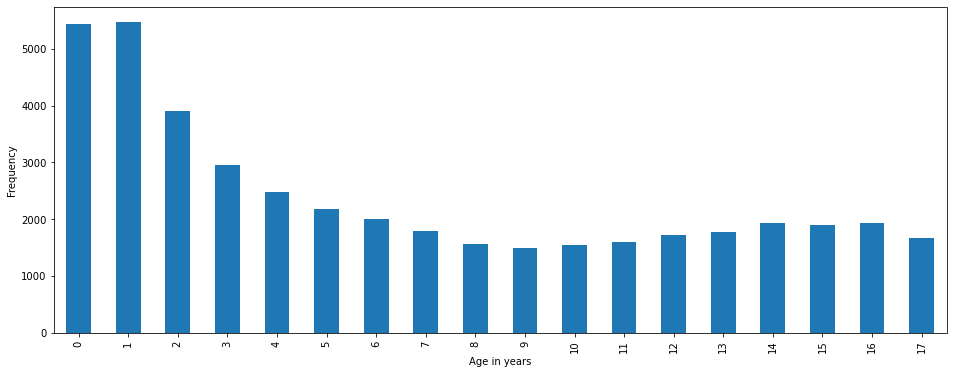

In [55]:
ax = TBI.groupby(['AgeinYears'])['PosIntFinal'].count().plot.bar(figsize=(16,6))
_ = ax.set_xlabel('Age in years')
_ = ax.set_ylabel('Frequency')

# <center> Distribution of sex with need of CT Scan </center>

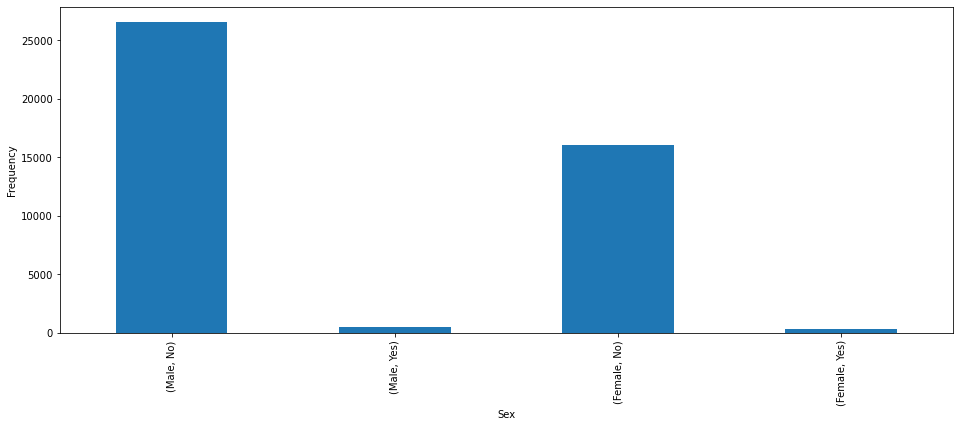

In [60]:
ax = TBI.groupby(['Gender','PosIntFinal'])['PosIntFinal'].count().plot.bar(figsize=(16,6))
_ = ax.set_xlabel('Sex')
_ = ax.set_ylabel('Frequency')

# <center> Distribution of Race in the model </center>

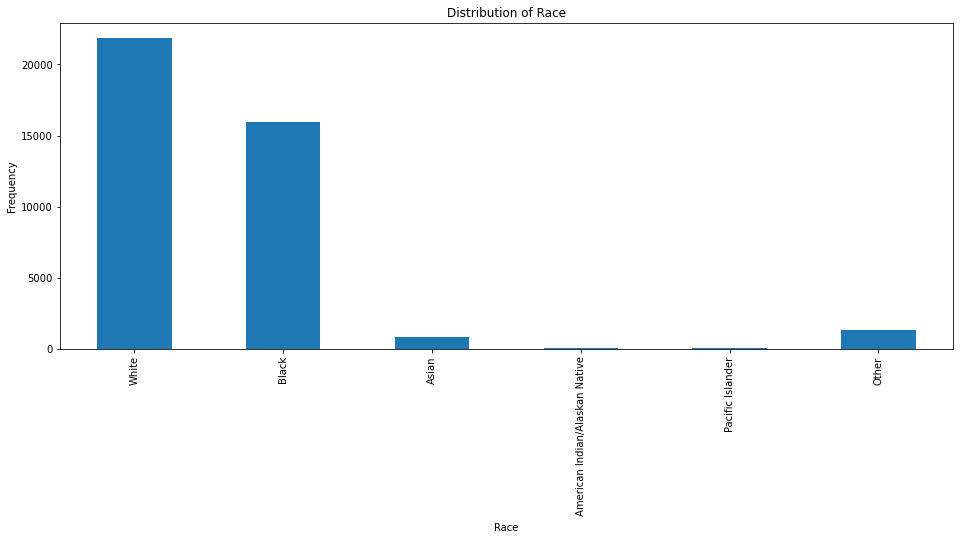

In [64]:
ax = TBI.groupby(['Race'])['PosIntFinal'].count().plot.bar(title="Distribution of Race", figsize=(16,6))
_ = ax.set_xlabel('Race')
_ = ax.set_ylabel('Frequency')

# <center> Distribution of Ethnicity in the model </center>

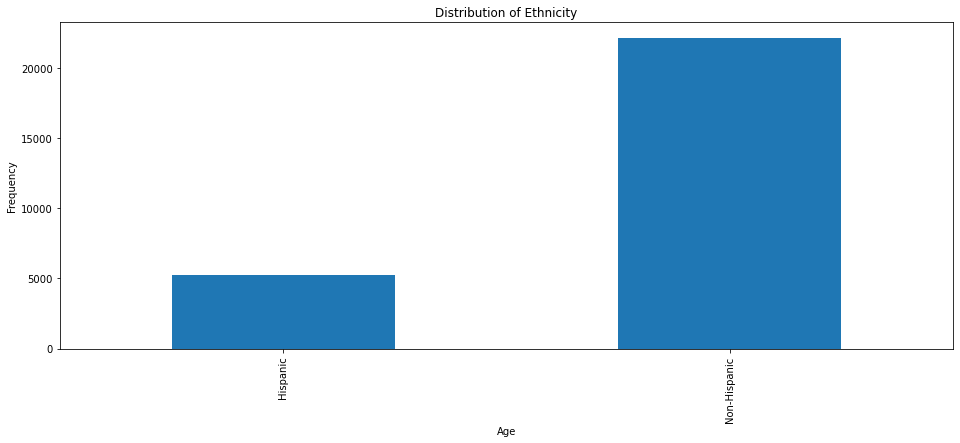

In [65]:
ax = TBI.groupby(['Ethnicity'])['PosIntFinal'].count().plot.bar(title="Distribution of Ethnicity", figsize=(16,6))
_ = ax.set_xlabel('Age')
_ = ax.set_ylabel('Frequency')